<h1>Graph and tables about meteorological variables</h1>

<p>This notebook organize a series of scripts under an <b>ELT</b> (<em>extract-load-transform</em>) scheme to organize data about the main meteorological variables into comprehensible graphs.</p>

The structure of the project is the following:
```
|--input/ (Input data and images(logos))
|
|--src/
|    |
|    |- config.py (Path to necessary files for the project and settings for the extract_and_load script)
|    |
|    |- extract.py (Process of extraction and load of data in the workspace)
|    |
|    |- transform.py (Creation of pandas dataframes with the data needed for each graph and table)
|    |
|    |- tables.py (Table generator)
|    |
|    |_ graphs.py (Curves and histograms generator)
|    
|--font/
|    |
|    |_ arial.ttf (Typography for the tables)
|
|--notebook/
|    |
|    |- scr2nb.py (Allow to import scripts from scr directory as part of a module in the notebook) 
|    |
|    |_ Graph_and_tables_about_meteorological_variables.ipynb (This notebook)
|
|__ README.md 
``` 

<h2>Importing libraries and necessary modules</h2>

In [1]:
import src2nb

import os

import pandas as pd

import numpy as np

import config

from extract import extract_and_load

from transform import station_temps_dataframes, station_vars_dataframes, station_temps_for_curves, rainfall_data

from tables import variables_table, temps_table

from graphs import temps_curves, min_categorical_T_histo, max_categorical_T_histo, rainfall_histo

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

warnings.simplefilter("ignore")

<h2>Importing the data</h2>

In [2]:
csv_dataframe_mapping = config.csv_to_dataframe_mapping()

<p>The csv_to_dataframe_mapping() function returns a dictionary conataining the name of a csv file as the key and the name of the dataframe that will contain its data as value.</p>

```{key: 'rainfall.csv', value: 'rainfall_dataframe'}```

In [3]:
database, months = extract_and_load(config.INPUT_DIR, csv_dataframe_mapping)

Here ```database``` is a dictionary that contains all the dataframes needed for the project.

In [4]:
database.keys()

dict_keys(['rainfall', 'normal_rainfall', 'max_rainfall_24', 'max_rainfall_24_day', 'rainfall_days', 'avg_helio', 'total_helio', 'moisture', 'qne', 'qnh', 'dew_T', 'max_T', 'avg_Tmax', 'day_Tmax', 'avg_T', 'min_T', 'avg_Tmin', 'day_Tmin', 't_0', 't_0_5', 't_35_40', 't_40', 'max_vel', 'avg_vel', 'location'])

<p>The dataframe of each variable has the following format:</p>

In [5]:
database['rainfall'].head()

,Station,code,1,2,3,4,5,6,7,8,9,10,11,12
0,Station_1,9999,57.8,42.5,66.6,5.8,6.5,0.1,0,21.8,18,35,29,128


<h2>Temperature curves, histograms and tables</h2>

<p>Temperature data of each station is extracted and organized in dataframes to later generate the curves, histograms and tables.</p>

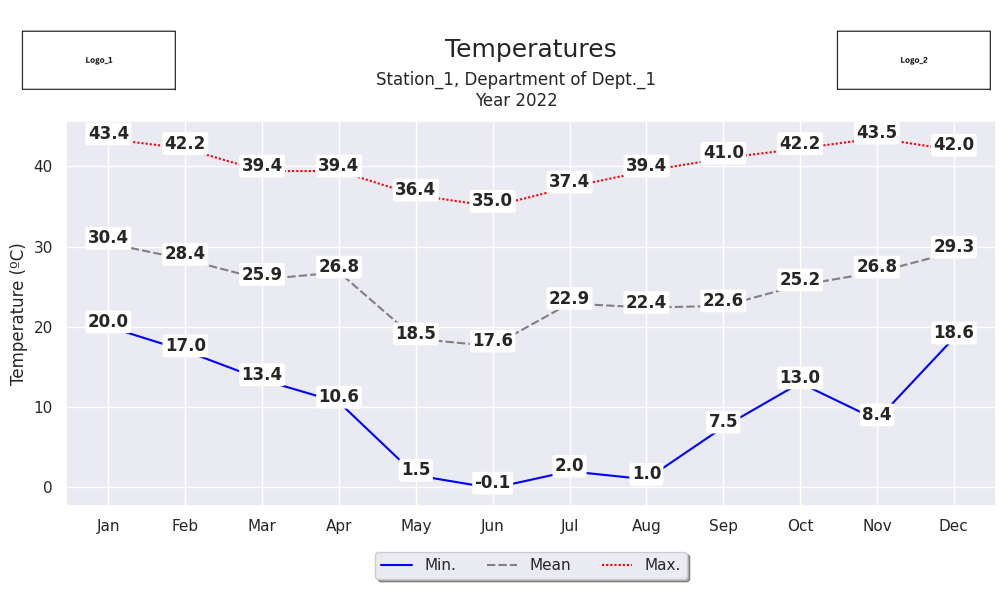

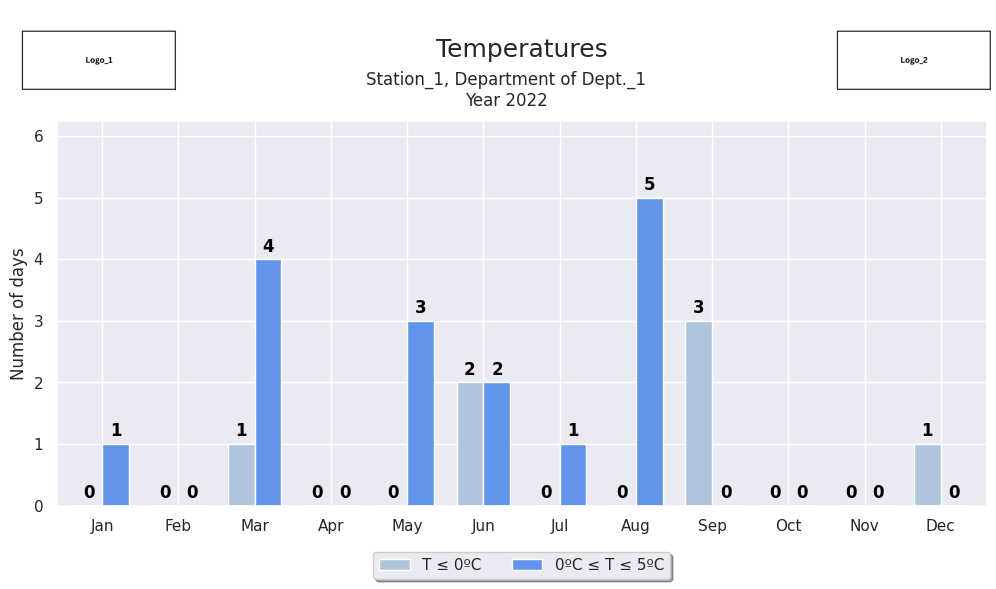

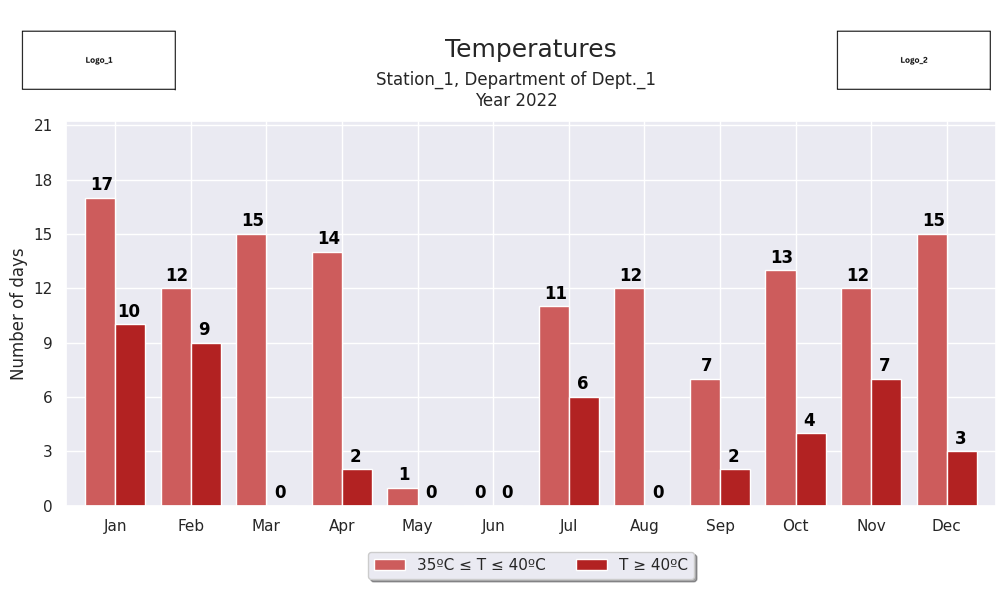

In [6]:
for i in range(database['rainfall'].shape[0]):
    
    #Organización de datos necesarios para la tabla. 
    extr_T,avg_T,cate_T,dew_T,station = station_temps_dataframes(database, months, i)
    
    #Generando la tabla de temperatura.
    temps_table(months,extr_T,avg_T,cate_T,dew_T,station)
    
    #Organización de datos necesarios para la curva de temperaturas. 
    data = station_temps_for_curves(extr_T.iloc[:-1,:], avg_T.iloc[:-1,:])
    
    #Generando las curvas.
    temps_curves(data, months.iloc[:-1,:], station)
    
    #Generando los histogramas de temperaturas extremas, tanto mínimas como máximas.
    min_categorical_T_histo(cate_T.iloc[:-1,:2], months.iloc[:-1,:], station)
    
    max_categorical_T_histo(cate_T.iloc[:-1,2:4], months.iloc[:-1,:], station)

<h2>Tables of other atmospheric variables</h2>

<p>Here, data of the following variables are placed into a table, one table for each station:

<ul>
    <li>Heliophany</li>
    <li>Pressure</li>
    <li>Rainfall</li>
    <li>Wind</li>
    <li>Moisture</li>
</ul>

also a barplot is generated showing the total precipitation of a month at the year of interest with the normal of the period 1991-2020 of every month.</p>

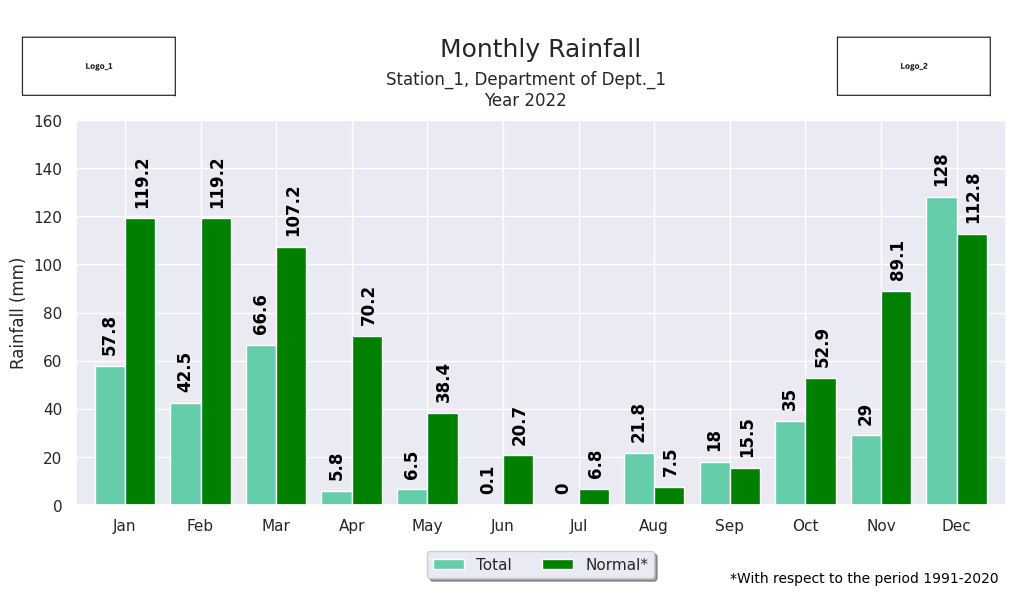

In [7]:
for i in range(database['rainfall'].shape[0]):
    
    heliophany,pres,rainfall,wind,moisture_df,station = station_vars_dataframes(months, database, i)
    
    variables_table(months,heliophany,pres,rainfall,wind,moisture_df,station)
    
    data = rainfall_data(database, i)
    
    rainfall_histo(data, months.iloc[:-1,:],station)